# Movie ratings data analysis
by Shuyan Liu

In the competitive film industry, understanding viewer preferences is key to strategic planning. This report analyzes movie ratings from 1,097 participants, across 400 movies, uncovering patterns that could inform a movie studio's decisions. Using rigorous statistical tests, it links audience characteristics to their cinematic choices, providing targeted insights for future initiatives.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
from scipy.stats import levene
from scipy.stats import kstest, norm
from scipy.stats import ks_2samp
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('/Users/shuyan/Desktop/DS1001/Data Analysis 1/movieReplicationSet.csv')
data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


# Brief dataset description

This dataset features ratings data of 400 movies from 1097 research participants. 

1st row: Headers (Movie titles/questions)

Row 2-1098: Responses from individual participants

Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)

Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)

Columns 422-464: These columns contain responses to personality questions (1-5)

Columns 465-474: These columns contain self-reported movie experience ratings (1-5)

Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)

Column 476: Only child (1 = yes, 0 = no, -1 = no response)

Column 477: Movies are best enjoyed alone (1 = yes, 0 = no,-1 = no response)

# Q1: Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?


We wanted to see if popular movies get higher ratings. First, we looked at how many ratings each movie contained and found the median of all 400 movies. We then split the movies into two groups. Movies with more ratings than the median (high popularity group) and movies with fewer ratings (low popularity group). We conducted a K-S test that showed that the data does follow a normal distribution. To confirm if our data meets the assumption of homogeneity of the variance. We performed a Levene's test to see if Variances are equal across all groups. The test result suggest that the variances are not equal across all groups therefore, we performed a Welch's t-test instead of an independent sample T-test that will give us more statistical power in such cases. The test returned a U-Statistic: 17.756049269873714 P-Value: 9.536936590851687e-52. Given our alpha level of 0.005, we reject the null hypothesis and conclude that high-popularity movies have significantly higher average ratings than movies that are less popular.

In [3]:
# Count # of ratings for each movies
ratings_count = data.iloc[:, 0:400].count()
ratings_count.sort_values()

Best Laid Plans (1999)         54
The Final Conflict (1981)      55
FeardotCom (2002)              56
Sexy Beast (2000)              56
Stir Crazy (1980)              59
                             ... 
Monsters  Inc.(2001)          927
The Lion King (1994)          937
Shrek 2 (2004)                965
Shrek (2001)                 1008
Finding Nemo (2003)          1014
Length: 400, dtype: int64

In [4]:
# Automatically deals with null values by reomving them from calculation
average_ratings = data.iloc[:, 0:400].mean(axis=0)
average_ratings

The Life of David Gale (2003)                2.151316
Wing Commander (1999)                        2.021127
Django Unchained (2012)                      3.153422
Alien (1979)                                 2.707612
Indiana Jones and the Last Crusade (1989)    2.778618
                                               ...   
Patton (1970)                                2.278689
Anaconda (1997)                              2.295455
Twister (1996)                               2.402299
MacArthur (1977)                             2.114754
Look Who's Talking (1989)                    2.337963
Length: 400, dtype: float64

In [5]:
ratings_count_df = pd.DataFrame({'Movie Name': ratings_count.index, 'ratings_count': ratings_count})
# Create a DataFrame for average_ratings with the movie names as the index
average_ratings_df = pd.DataFrame({'Movie Name': average_ratings.index, 'average_rating': average_ratings})
# Merge the two DataFrames based on the 'Movie Name' column
df = pd.merge(ratings_count_df, average_ratings_df, on='Movie Name')
df = df.sort_values(by="ratings_count")
df

,Movie Name,ratings_count,average_rating
249,Best Laid Plans (1999),54,2.046296
334,The Final Conflict (1981),55,2.309091
346,FeardotCom (2002),56,2.205357
109,Sexy Beast (2000),56,2.232143
133,Stir Crazy (1980),59,2.194915
...,...,...,...
267,Monsters Inc.(2001),927,3.352211
220,The Lion King (1994),937,3.459979
57,Shrek 2 (2004),965,2.825907
87,Shrek (2001),1008,3.133929


In [6]:
# Finding the median of ratings count
median_ratings_count = df['ratings_count'].median()
median_ratings_count

197.5

In [7]:
# Split into two groups
high_popularity_movies = df[df['ratings_count'] >= median_ratings_count]
low_popularity_movies = df[df['ratings_count'] < median_ratings_count]

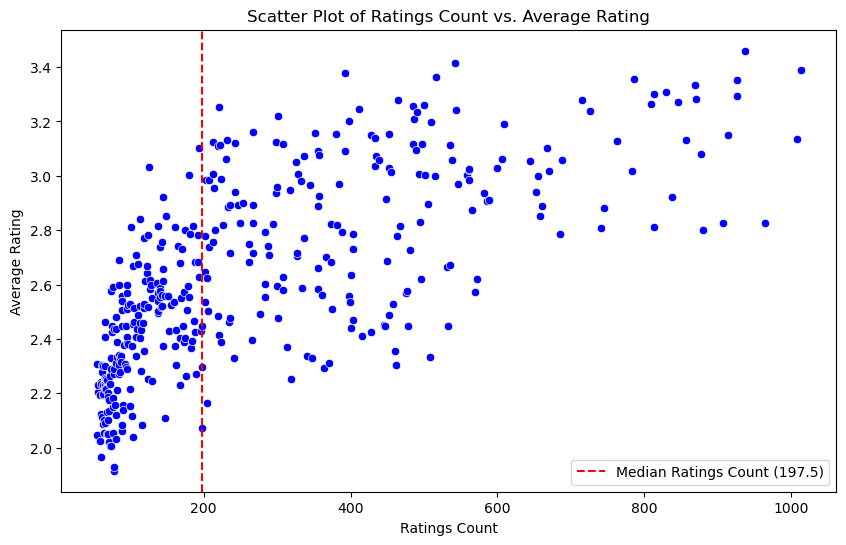

In [8]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ratings_count', y='average_rating', color='blue')
plt.xlabel("Ratings Count")
plt.ylabel("Average Rating")
plt.title("Scatter Plot of Ratings Count vs. Average Rating")
plt.axvline(x=median_ratings_count, color='red', linestyle='--', label=f'Median Ratings Count ({median_ratings_count})')
plt.legend()
plt.show()

Here from the scatter plot we can already get a general idea that movies with higher counts tend to have higher average ratings. Furthur statistic tests are required to see if it is statistically significant.

In [9]:
# Split into two groups for statistic tests
group1 = df[df['ratings_count'] >= median_ratings_count]['average_rating']
group2 = df[df['ratings_count'] < median_ratings_count]['average_rating']

(array([0.24281365, 0.51800245, 0.93887944, 1.11694278, 1.00362975,
        0.79319125, 0.53419003, 0.79319125, 0.38850184, 0.14568819]),
 array([1.91558442, 2.07002384, 2.22446326, 2.37890269, 2.53334211,
        2.68778154, 2.84222096, 2.99666038, 3.15109981, 3.30553923,
        3.45997866]),
 <BarContainer object of 10 artists>)

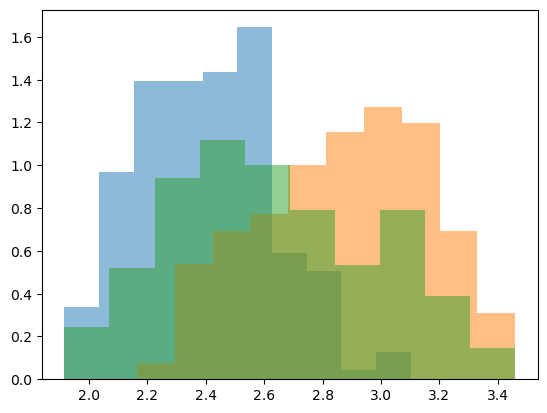

In [10]:
# plot to see the distribution of each dataset
plt.hist(group2, alpha=0.5,density = True)
plt.hist(group1, alpha = 0.5,density = True)
plt.hist(df['average_rating'], alpha=0.5,density = True)

K-S test to confirm the normaility of our datasets

In [11]:
# Compute mean and standard deviation of group1
mean1, std1 = np.mean(group1), np.std(group1)
# K-S test for normality on group1
statistic1, pvalue1 = kstest(group1, 'norm', args=(mean1, std1))
print(f"group1: K-S statistic = {statistic1:.5f}, p-value = {pvalue1:.5f}")
if pvalue1 > 0.05:
    print(f"Group 1 is Gaussian.")
else:
    print(f'Group 1 is not Gaussian.')

# Compute mean and standard deviation of group2
mean2, std2 = np.mean(group2), np.std(group2)

# K-S test for normality on group2
statistic2, pvalue2 = kstest(group2, 'norm', args=(mean2, std2))
print(f"group2: K-S statistic = {statistic2:.5f}, p-value = {pvalue2:.5f}")
if pvalue2 > 0.05:
    print(f"Group 2 is Gaussian.")
else:
    print(f'Group 2 is not Gaussian.')

group1: K-S statistic = 0.07204, p-value = 0.23864
Group 1 is Gaussian.
group2: K-S statistic = 0.05459, p-value = 0.57135
Group 2 is Gaussian.


Our data sets are normally distributed given the result of K-S test, we perform levene's test to confirm if our data sets meet homogeneity of the variance.

In [12]:
# Perform Levene's test
statistic, pvalue = levene(group1, group2)

print(f"Levene's Test Statistic: {statistic}")
print(f"P-value: {pvalue}")

if pvalue > 0.05:
    print("Fail to reject the null hypothesis - Variances are equal across all groups.")
else:
    print("Reject the null hypothesis - Variances are not equal across all groups.")

Levene's Test Statistic: 12.924660098096007
P-value: 0.0003650086478858589
Reject the null hypothesis - Variances are not equal across all groups.


Since our data sets do not meet the homogeneity of the variance, we should perform a Welch's t-test that gives us more statistical power.

In [13]:
#perform a Welch's t-test 

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
alpha = 0.005
if p_value < alpha:
    print("High popularity movies have significantly higher average ratings.")
else:
    print("There is no significant difference in average ratings between high and low popularity movies.")

T-Statistic: 17.756049269873714
P-Value: 9.536936590851687e-52
High popularity movies have significantly higher average ratings.


# Q2: Are movies that are newer rated differently than movies that are older?


We did a K-S test to see if the ratings of both groups followed a normal distribution, the test result suggested that our data is normally distributed. The Leven's test suggests equal variances for our data sets. Therefore, we conducted an independent samples t-test that works best in this case. It returned a T-Statistic: 1.605479609469516
P-Value: 0.10918141397981912. Given our alpha level of 0.005, we failed to reject the null hypothesis and concluded that there is no significant difference between the ratings of newer and older movies.

In [14]:
# Extract Year from the movie title
movie_list = []
year_list =[]
for movie in (data.iloc[:, 0:400].columns):
    match = re.search(r'\((\d{4})\)$', movie)
    year = match.group(1)
    movie_list.append(movie)
    year_list.append(year)

In [15]:
# Merging two dfs to get a df with year and matched average rating.
year_df = pd.DataFrame({'Movie Name': movie_list, 'year': year_list})
q2_df = pd.merge(year_df, average_ratings_df, on='Movie Name')
q2_df = q2_df.sort_values(by="year")
q2_df

,Movie Name,year,average_rating
17,Psycho (1960),1960,2.925770
122,The Good the Bad and the Ugly (1966),1966,2.787293
135,The Silencers (1966),1966,2.230769
162,Who's Afraid of Virginia Woolf (1966),1966,2.642276
268,Thoroughly Modern Millie (1967),1967,2.372549
...,...,...,...
371,Captain America: Civil War (2016),2016,3.058550
259,Ouija: Origin of Evil (2016),2016,2.073604
225,Split (2016),2016,2.936455
319,La La Land (2016),2016,3.003584


In [16]:
# Getting the year median
median_year = q2_df['year'].median()
median_year = median_year.astype(int)
median_year

1999

In [17]:
# Converting year in df to int
q2_df['year'] = q2_df['year'].astype(int)

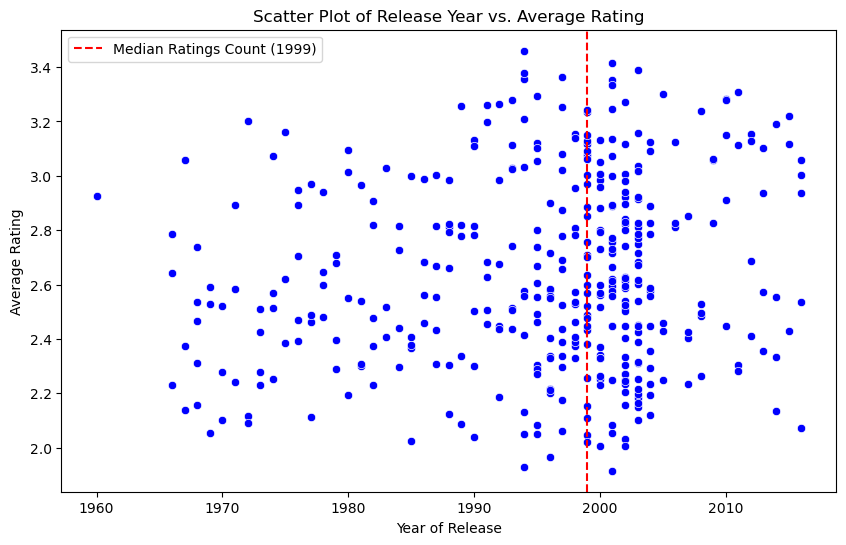

In [18]:
# Scatter Plot to get a general idea of our df
plt.figure(figsize=(10, 6))
sns.scatterplot(data=q2_df, x='year', y='average_rating', color='blue')
plt.xlabel("Year of Release")
plt.ylabel("Average Rating")
plt.title("Scatter Plot of Release Year vs. Average Rating")
plt.axvline(x=median_year, color='red', linestyle='--', label=f'Median Ratings Count ({median_year})')
plt.legend()
plt.show()

In [19]:
# Split into two groups for statistic tests
group1 = q2_df[q2_df['year'] >= median_year]['average_rating']
group2 = q2_df[q2_df['year'] < median_year]['average_rating']
group1,group2

(219    2.635000
 215    2.432099
 386    2.520979
 287    2.257576
 224    2.155000
          ...   
 371    3.058550
 259    2.073604
 225    2.936455
 319    3.003584
 149    2.537594
 Name: average_rating, Length: 203, dtype: float64,
 17     2.925770
 122    2.787293
 135    2.230769
 162    2.642276
 268    2.372549
          ...   
 305    2.955607
 155    2.406250
 345    2.782258
 177    3.140878
 130    2.572254
 Name: average_rating, Length: 197, dtype: float64)

K-S test to confirm normality.

In [20]:
# Compute mean and standard deviation of group1
mean1, std1 = np.mean(group1), np.std(group1)
# K-S test for normality on group1
statistic1, pvalue1 = kstest(group1, 'norm', args=(mean1, std1))
print(f"group1: K-S statistic = {statistic1:.5f}, p-value = {pvalue1:.5f}")
if pvalue1 > 0.05:
    print(f"Group 1 is Gaussian.")
else:
    print(f'Group 1 is not Gaussian.')

# Compute mean and standard deviation of group2
mean2, std2 = np.mean(group2), np.std(group2)

# K-S test for normality on group2
statistic2, pvalue2 = kstest(group2, 'norm', args=(mean2, std2))
print(f"group2: K-S statistic = {statistic2:.5f}, p-value = {pvalue2:.5f}")
if pvalue2 > 0.05:
    print(f"Group 2 is Gaussian.")
else:
    print(f'Group 2 is not Gaussian.')

group1: K-S statistic = 0.06311, p-value = 0.37823
Group 1 is Gaussian.
group2: K-S statistic = 0.08365, p-value = 0.11994
Group 2 is Gaussian.


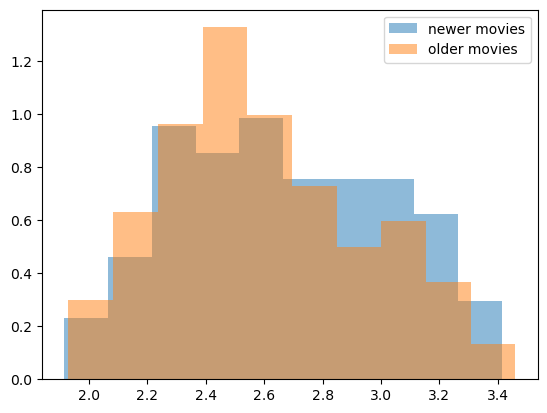

In [21]:
plt.hist(group1,alpha = 0.5,label = 'newer movies',density = True)
plt.hist(group2,alpha = 0.5, label = 'older movies',density = True)
plt.legend()

data sets are Gaussian, perform Levene's test to confirm equal variances.

In [22]:
# Perform Levene's test
statistic, pvalue = levene(group1, group2)

print(f"Levene's Test Statistic: {statistic}")
print(f"P-value: {pvalue}")

if pvalue > 0.05:
    print("Fail to reject the null hypothesis - Variances are equal across all groups.")
else:
    print("Reject the null hypothesis - Variances are not equal across all groups.")

Levene's Test Statistic: 1.6620802393442529
P-value: 0.1980714428132103
Fail to reject the null hypothesis - Variances are equal across all groups.


The variances are euqal in our two datasets, perform an independent samples t-test.

In [23]:
#perform a independent samples t-test.

t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
alpha = 0.005
if p_value < alpha:
    print("Newer movies have significantly higher average ratings.")
else:
    print("There is no significant difference in average ratings between newer and older movies.")

T-Statistic: 1.605479609469516
P-Value: 0.10918141397981912
There is no significant difference in average ratings between newer and older movies.


# Q3: Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [24]:
shrek_df = data[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]

In [25]:
mean_rating = shrek_df['Shrek (2001)'].mean()
mean_rating

3.1339285714285716

In [26]:
shrek_f_df=shrek_df[shrek_df['Gender identity (1 = female; 2 = male; 3 = self-described)']==1.0]
shrek_m_df=shrek_df[shrek_df['Gender identity (1 = female; 2 = male; 3 = self-described)']==2.0]
group1 = shrek_f_df['Shrek (2001)'].dropna()
group2 = shrek_m_df['Shrek (2001)'].dropna()
group1,group2

(0       3.0
 1       3.0
 2       3.5
 3       0.5
 4       3.0
        ... 
 1092    3.0
 1093    4.0
 1094    3.5
 1095    2.5
 1096    2.0
 Name: Shrek (2001), Length: 743, dtype: float64,
 9       4.0
 13      3.0
 15      3.5
 19      2.0
 22      3.0
        ... 
 1082    4.0
 1084    1.0
 1088    2.5
 1089    3.0
 1090    3.0
 Name: Shrek (2001), Length: 241, dtype: float64)

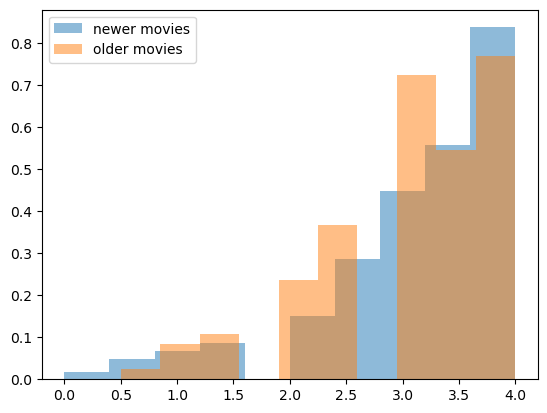

In [27]:
plt.hist(group1,alpha = 0.5,label = 'newer movies',density=True)
plt.hist(group2,alpha = 0.5, label = 'older movies',density=True)
plt.legend()

From the histogram we can see that our data is clearly not normally distributed.

In [28]:
# our data is not normally distributed
statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)
alpha = 0.005
if p_value < alpha:
    print("Enjoyment of ‘Shrek (2001)’ is gendered")
else:
    print("Enjoyment of ‘Shrek (2001)’ is not gendered")

Mann-Whitney U Statistic: 96830.5
p-value: 0.050536625925559006
Enjoyment of ‘Shrek (2001)’ is not gendered


Our histogram indicated that neither the male nor female ratings followed a normal distribution. Given this, we opted for the Mann-Whitney U test to compare the two groups. The test yielded a U statistic of 96830.5 and a p-value of 0.05054. Since this p-value exceeds our alpha of 0.005, we failed to reject the null hypothesis and conclude that there is no statistically significant difference in the ratings of 'Shrek (2001)' between male and female viewers. We used an element-wise method to remove the null values that resulted in a different sample size for each group, female: 743, male: 241. While the Mann-Whitney U test does not require sample size, this could reduce the power of our test.

# Q4: What proportion of movies are rated differently by male and female viewers?

To find the proportion of movies that are rated differently by male and female viewers, we performed K-S test to confirm the normailty of each movie in our data file. If the data is not normally distributed then a mannwhitneyu test will be conducted. If normally distributed, we will perform a Leven's test to determine if the variances are equal arcoss our data sets. If yes, we will perform an independent samples t-test. If not, we will perform a Welch's test. We ran these tests for all 400 movies in our data file and the outcome shows that 12.75% of the movies are rated differently by male and female viewers.

In [29]:
# counter for different ratings
count_different_ratings = 0

In [30]:
count = 0
for i in range(1, 401):  # Columns 1-400 are movie ratings
    # Extract ratings for the current movie
    movie_ratings = data.iloc[:, i-1]

    # Extract ratings based on gender
    male_ratings = movie_ratings[data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2.0].dropna()
    female_ratings = movie_ratings[data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1.0].dropna()

    # Compute the mean and standard deviation of the data
    male_mean = np.mean(male_ratings)
    male_std = np.std(male_ratings)
    
    # Perform the KS test
    # The 'cdf' parameter is set to 'norm' which stands for the normal distribution.
    # The 'args' parameter receives the parameters of the distribution, in this case, the mean and std of the data.
    D, p_value_male = kstest(male_ratings, 'norm', args=(male_mean, male_std))

    female_mean = np.mean(female_ratings)
    female_std = np.std(female_ratings)
    D, p_value_fem = kstest(female_ratings, 'norm', args=(female_mean, female_std))

    alpha = 0.005
    if p_value_fem > alpha and p_value_male > alpha: #null hypothesis: data is normally distributed
      count +=1
      # Perform t-test
      statistic, p_value_var = levene(female_ratings, male_ratings)
      if p_value_var < alpha:
        t_stat, p_val_ttest = ttest_ind(male_ratings, female_ratings, equal_var=False)
        # Check if p-value is less than our alpha level
        if p_val_ttest < alpha:
            count_different_ratings += 1
      else:
        t_stat, p_val_ttest = ttest_ind(male_ratings, female_ratings, equal_var=True)
        # Check if p-value is less than our alpha level
        if p_val_ttest < alpha:
            count_different_ratings += 1
    else:
      statistic, p_value_mw = mannwhitneyu(male_ratings, female_ratings, alternative='two-sided')
      if p_value_mw < alpha:
        count_different_ratings += 1

In [31]:
# Calculate the proportion where ratings are gendered.
proportion_different_ratings = count_different_ratings / 400 # Total movie = 400
print(f'{proportion_different_ratings*100}% are rated differently by male and female viewers.')

12.75% are rated differently by male and female viewers.


# Q5: Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

To analyze the effect of having or not siblings in the ratings of The Lion King (1994). We performed a Mann-Whitney U-test between two groups because the data was not normally distributed. With a p-value of ~0.97 that exceeds our threshold, we fail to reject the null hypothesis and conclude that the amount of siblings does not affect enjoyment of The Lion King. Since we used element-wise removal of null values, we had a large difference between two groups, this would reduce our statistical power.

In [32]:
# Getting the desired data from our df and split into two groups.
q5_df = data[['The Lion King (1994)','Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
only_child = q5_df[q5_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==1]
have_siblings = q5_df[q5_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==0]
group1 = only_child['The Lion King (1994)'].dropna()
group2 = have_siblings['The Lion King (1994)'].dropna()
group1,group2

(2       4.0
 4       4.0
 5       4.0
 22      3.5
 33      3.5
        ... 
 1058    3.0
 1068    3.5
 1075    4.0
 1076    3.5
 1088    3.0
 Name: The Lion King (1994), Length: 151, dtype: float64,
 0       4.0
 3       3.0
 6       3.5
 7       4.0
 8       4.0
        ... 
 1090    3.5
 1091    4.0
 1092    3.5
 1093    3.5
 1096    4.0
 Name: The Lion King (1994), Length: 776, dtype: float64)

In [33]:
only_child['The Lion King (1994)'].mean()

3.347682119205298

In [34]:
have_siblings['The Lion King (1994)'].mean()

3.481958762886598

Text(0.5, 1.0, 'Group 2')

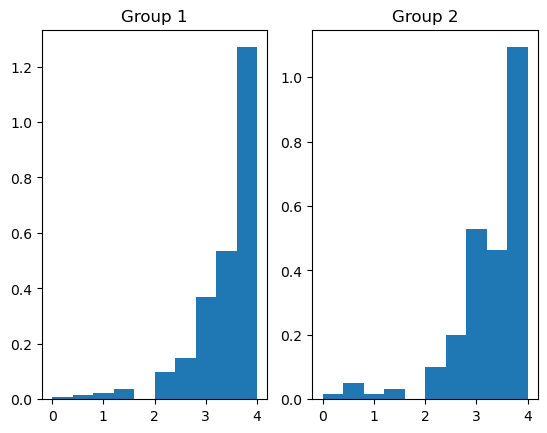

In [35]:
# Plot both group to get an general idea of the data.
plt.subplot(1,2,1)
plt.hist(group2, density=True)
plt.title('Group 1')

plt.subplot(1,2,2)
plt.hist(group1, density=True)
plt.title('Group 2')

In [36]:
#since the data is not normally distributed
statistic, p_value = mannwhitneyu(group1, group2, alternative='greater') # we want to know if grou1(onlychild) enjoy more.

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("People with no siblings enjoy the movie more.")
else:
    print("People with no siblings do not enjoy the movie more.")


Mann-Whitney U Statistic: 52929.0
p-value: 0.978419092554931
People with no siblings do not enjoy the movie more.


# Q6: What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

As explained in Q4, we took a same approach to answer this question. The result showed that 1.75% of moveis are rated different by viewers with siblings vs those without.

In [37]:
count_different_ratings = 0
count = 0
norm_count =0
not_norm_count =0
for i in range(1, 401):  # Columns 1-400 are movie ratings
    # Extract ratings for the current movie
    child = data.iloc[:, i-1]

    # Extract ratings based on gender
    only_child = child[data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].dropna()
    have_siblings = child[data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].dropna()

    # Compute the mean and standard deviation of the data
    only_child_mean = np.mean(only_child)
    only_child_std = np.std(only_child)
    
    # Perform the KS test
    # The 'cdf' parameter is set to 'norm' which stands for the normal distribution.
    # The 'args' parameter receives the parameters of the distribution, in this case, the mean and std of the data.
    D, p_value_only_child = kstest(only_child, 'norm', args=(only_child_mean, only_child_std))

    have_siblings_mean = np.mean(have_siblings)
    have_siblings_std = np.std(have_siblings)
    D, p_value_have_siblings = kstest(have_siblings, 'norm', args=(have_siblings_mean, have_siblings_std))

    alpha = 0.005
    if p_value_only_child > alpha and p_value_have_siblings > alpha: #null hypothesis: data is normally distributed
      norm_count +=1
      count +=1
      # Perform t-test
      statistic, p_value_var = levene(only_child, have_siblings)
      if p_value_var < alpha:
        t_stat, p_val_ttest = ttest_ind(only_child, have_siblings, equal_var=False)
        # Check if p-value is less than 0.005
        if p_val_ttest < alpha:
            count_different_ratings += 1
      else:
        t_stat, p_val_ttest = ttest_ind(only_child, have_siblings, equal_var=True)
        # Check if p-value is less than 0.005
        if p_val_ttest < alpha:
            count_different_ratings += 1
    else: #data is not normally distributed
      not_norm_count +=1
      statistic, p_value_mw = mannwhitneyu(only_child, have_siblings, alternative='two-sided')
      if p_value_mw < alpha:
        count_different_ratings += 1
prop = count_different_ratings/400
print(f'{round((prop*100),2)}% of movies exhibit an only child effect.')

1.75% of movies exhibit an only child effect.


# Q7: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

To assess this, we first divided people who rated this movie into 2 groups, social and non-social watchers. We did a Levene’s test to find if there was a statistically significant difference in the variance of the ratings given by these two groups. The p-value for the test was 0.37, indicating no variance. Since the data was evidently not normally distributed, we proceeded with a ‘greater than’ Mann-WhitneyU test to check if social watchers enjoyed the movie more. The p-value was 0.94, implying that people who like to watch movies socially do not enjoy the movie more than those who like to watch it alone.

In [38]:
# Getting the desired data from our df and split into two groups.
q7_df = data[['The Wolf of Wall Street (2013)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
social = q7_df[q7_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0]
alone = q7_df[q7_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1]
group1 = social['The Wolf of Wall Street (2013)'].dropna()
group2 = alone['The Wolf of Wall Street (2013)'].dropna()
group1,group2

(5       2.5
 6       1.0
 12      3.5
 14      4.0
 18      4.0
        ... 
 1082    4.0
 1085    4.0
 1087    4.0
 1093    3.5
 1094    2.0
 Name: The Wolf of Wall Street (2013), Length: 270, dtype: float64,
 3       4.0
 4       3.0
 7       3.5
 8       3.5
 9       3.0
        ... 
 1078    3.5
 1080    4.0
 1086    3.5
 1090    4.0
 1096    4.0
 Name: The Wolf of Wall Street (2013), Length: 393, dtype: float64)

Text(0.5, 1.0, 'Group 2')

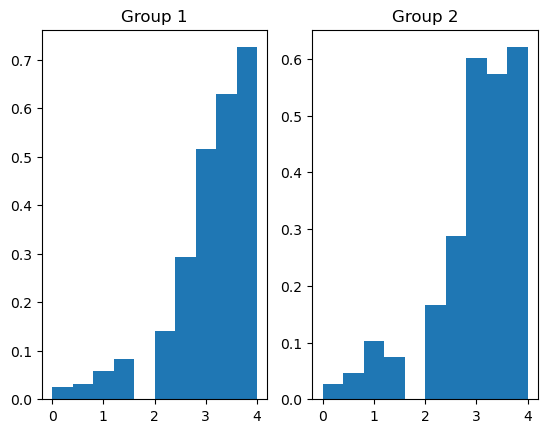

In [39]:
# Plot both groups to get an understanding of the distribution.

plt.subplot(1,2,1)
plt.hist(group2, density=True)
plt.title('Group 1')

plt.subplot(1,2,2)
plt.hist(group1, density=True)
plt.title('Group 2')

From the graph we can conclude that both of the groups are not normally distributed.

In [40]:
# Since the data is not normal.
statistic, p_value = mannwhitneyu(group1, group2, alternative='greater')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("People who like to watch movies socially enjoy the movie more.")
else:
    print("People who like to watch movies socially do not enjoy the movie more than those who like to watch it alone.")

Mann-Whitney U Statistic: 49303.5
p-value: 0.9436657996253056
People who like to watch movies socially do not enjoy the movie more than those who like to watch it alone.


# Q8: What proportion of movies exhibit such a “social watching” effect?

We took a similar approach to this proportion-related question as well - divided all users into two groups: social and non-social watchers per movie. We chose the test with the most statistical power for each movie by checking for normality and then for similarity of variances in both groups. Here we found that 1.5% of movies exhibit a social watching effect i.e., have people enjoy watching movies socially enjoyed them more than those who prefer to watch them alone.

In [41]:
count_different_ratings = 0
count = 0
norm_count =0
not_norm_count =0
for i in range(1, 401):  # Columns 1-400 are movie ratings
    # Extract ratings for the current movie
    temp = data.iloc[:, i-1]

    social = temp[data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0].dropna()
    alone = temp[data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1].dropna()

    # Compute the mean and standard deviation of the data
    social_mean = np.mean(social)
    social_std = np.std(social)
    # Perform the KS test
    # The 'cdf' parameter is set to 'norm' which stands for the normal distribution.
    # The 'args' parameter receives the parameters of the distribution, in this case, the mean and std of the data.
    D, p_value_social = kstest(social, 'norm', args=(social_mean, social_std))

    alone_mean = np.mean(alone)
    alone_std = np.std(alone)
    D, p_value_alone = kstest(alone, 'norm', args=(alone_mean, alone_std))

    alpha = 0.005
    if p_value_social > alpha and p_value_alone > alpha: #null hypothesis: data is normally distributed
      norm_count +=1
      count +=1
      # Perform t-test
      statistic, p_value_var = levene(social, alone)
      if p_value_var < alpha:
        t_stat, p_val_ttest = ttest_ind(social, alone, equal_var=False)
        if p_val_ttest < alpha:
            count_different_ratings += 1
      else:
        t_stat, p_val_ttest = ttest_ind(social, alone, equal_var=True)
        if p_val_ttest < alpha:
            count_different_ratings += 1


    else: #data is not normally distributed
      not_norm_count +=1
      statistic, p_value_mw = mannwhitneyu(social, alone, alternative='greater')
      if p_value_mw < alpha:
        count_different_ratings += 1
prop = count_different_ratings/400
print(f'{round((prop*100),2)}% of movies exhibit a “social watching” effect.')

1.5% of movies exhibit a “social watching” effect.


# Q9:  Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

We created 2 groups with the ratings of the 2 movies. We plotted both groups where we found that the data was not distributed normally. Thereafter, we did a KS test to find if there is a significant difference between the distributions of the two samples. P-value was of the order of 10e-10, indicating significant difference between the groups. 

In [42]:
# Getting the desired data from our df and split into two groups.
q9_df = data[['Home Alone (1990)','Finding Nemo (2003)']]
group1 = q9_df['Home Alone (1990)'].dropna()
group2 = q9_df['Finding Nemo (2003)'].dropna()
group1,group2

(0       4.0
 1       4.0
 2       4.0
 3       1.5
 4       2.0
        ... 
 1087    3.5
 1090    2.5
 1091    3.5
 1093    3.5
 1096    3.0
 Name: Home Alone (1990), Length: 857, dtype: float64,
 0       3.5
 1       4.0
 2       3.5
 3       2.5
 4       2.5
        ... 
 1092    2.5
 1093    4.0
 1094    1.5
 1095    4.0
 1096    4.0
 Name: Finding Nemo (2003), Length: 1014, dtype: float64)

Text(0.5, 1.0, 'Group 2')

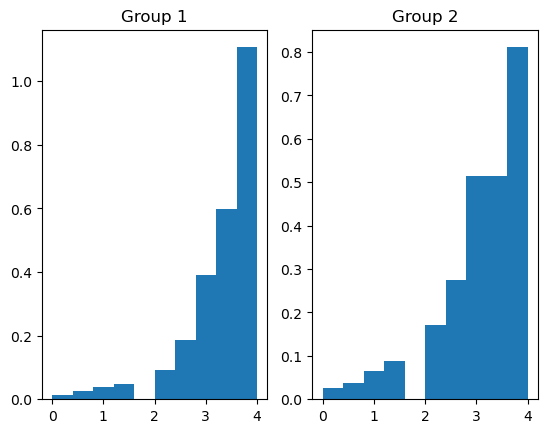

In [43]:
# Plot for general idea of the groups.
plt.subplot(1,2,1)
plt.hist(group2, density=True)
plt.title('Group 1')

plt.subplot(1,2,2)
plt.hist(group1, density=True)
plt.title('Group 2')

In [44]:
#K-S test to confirm difference in distribution
statistic, p_value = ks_2samp(group1, group2)

# Print the results
print("KS Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("There is evidence of a significant difference between the two samples' distributions.")
else:
    print("There is no evidence of a significant difference between the two samples' distributions.")

KS Statistic: 0.15269080020897632
p-value: 6.379397182836346e-10
There is evidence of a significant difference between the two samples' distributions.


# Q10: There are ratings on movies from several franchises (‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? 

For each of the franchise, we selected the columns that belonged to the franchise. We only kept rows that had no null values since it would be invalid to check for inconsistency in the ratings given by a user if they haven’t watched all movies of the franchise. We conducted a one-way f-statistic for each franchise to check if there is any significant difference among at least one pair of movies within the franchise. We found that from the franchises’ listed, only Harry Potter and Pirates of the Caribbean had consistent quality (there was no significant difference in the movies under these franchises). 

In [45]:
franchise_list = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
# Convert the list to a string representation
franchise_list = [re.escape(movie) for movie in franchise_list]
for movie in franchise_list:
  selected_columns = data.columns[data.columns.str.contains(movie)]
  selected_data = data[selected_columns]
  selected_data = selected_data.dropna() #if any row has a null value, drop the row

  f_statistic, p_value = f_oneway(*[selected_data[column] for column in selected_data.columns])
  
  # # Print the results
  # print("F-statistic:", f_statistic)
  # print("p-value:", p_value)

  # Interpret the results based on the p-value and your chosen significance level (e.g., 0.05)
  if p_value < alpha:
      print(f"There is evidence of a significant difference among at least one pair of groups for {movie}.")
  else:
      print(f"There is no evidence of a significant difference among the groups for {movie}.")

There is evidence of a significant difference among at least one pair of groups for Star\ Wars.
There is no evidence of a significant difference among the groups for Harry\ Potter.
There is evidence of a significant difference among at least one pair of groups for The\ Matrix.
There is evidence of a significant difference among at least one pair of groups for Indiana\ Jones.
There is evidence of a significant difference among at least one pair of groups for Jurassic\ Park.
There is no evidence of a significant difference among the groups for Pirates\ of\ the\ Caribbean.
There is evidence of a significant difference among at least one pair of groups for Toy\ Story.
There is evidence of a significant difference among at least one pair of groups for Batman.


# Extra Question: Are people who get completely immersed in the alternative reality of the film when watching a movie tend to leave a review for the movies that they watched?

In this question we want to know if people who thinks they get immersed in the alternative reality of the film tends to leave a rating for the movies they watched than people who are less immersed. Based on the survey we had, on a scale of 1-6, we split data into two groups. We consider the people who give a rating greater than 3 a immersed viewer, and others as less immersed viewers. We performed a Mann-Whitney U test on two groups. The test returned a p-value:1.641e-18 which is smaller than our alpha of 0.005. We reject the null hypothsis and conclude that immersed viewers does tend to leave more movie ratings. However, it is important to consider that immersed viewers might also tend to watch more movies than less immersed viewers. This behavioral difference could be a confounding variable that affects the number of ratings left by a viewer. If immersed viewers do indeed watch more films, the higher number of ratings could be a result of higher viewership rather than a direct correlation with their level of immersion. Since we donot have the access to gather the data of the number of movies watched by each respondent, further research is necessary to untangle these influences.

In [46]:
less_immersed = data[data['When watching a movie I get completely immersed in the alternative reality of the film']<=3]
immersed = data[data['When watching a movie I get completely immersed in the alternative reality of the film']>3]

In [47]:
# Getting the ratings only for our targeted groups
immersed_ratings = immersed.iloc[:,:400] #immersed viewer's ratings
less_immersed_ratings = less_immersed.iloc[:,:400] #less immersed viewer's ratings


In [48]:
# Count total number of ratings each viewer has
group1 = immersed_ratings.notna().sum(axis=1) 
group2 = less_immersed_ratings.notna().sum(axis=1)
group1,group2

(0        70
 1        22
 2        27
 3        82
 4       118
        ... 
 1090    119
 1092     60
 1093    357
 1094     83
 1096    111
 Length: 829, dtype: int64,
 14       61
 17       15
 20       66
 21       30
 24      101
        ... 
 1083     23
 1087    253
 1088     96
 1091     50
 1095     32
 Length: 245, dtype: int64)

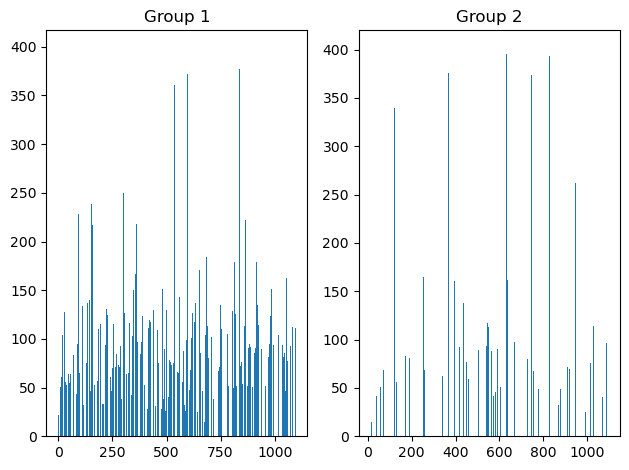

In [49]:
# Plot both groups to get an overall understanding
plt.subplot(1,2,1)
plt.bar(group1.index,group1.values)
plt.title('Group 1')

plt.subplot(1,2,2)
plt.bar(group2.index,group2.values)
plt.title('Group 2')
plt.tight_layout()

In [50]:
# Since both of the groups are not normally distributed, we will perform a Mann-WhitneyU test

statistic, p_value_mw = mannwhitneyu(group1, group2, alternative='greater') #set alternative to greater to see if group1(immersed viewers) tends to have larger values
# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("Immersed viewers leave more ratings.")
else:
    print("The ratings participation level is not statisticlly significant between immersed and less immersed viewers.")


Mann-Whitney U Statistic: 104127.0
p-value: 1.6410731510652519e-18
Immersed viewers leave more ratings.
